# ***Data preparing***

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/TOW/Face_Analytics/YOLOv6
!pip install -r requirements.txt

      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.


In [2]:
# Tao Yaml de cho YOLOv6 biet foler train, folder val va so class, tên class
!rm data/mydataset.yaml
!echo 'train: ../datasets/data/images/train' >> data/mydataset.yaml
!echo 'val: ../datasets/data/images/val' >> data/mydataset.yaml
!echo 'test: ../datasets/data/images/test' >> data/mydataset.yaml
!echo 'is_coco: False' >> data/mydataset.yaml
!echo 'nc: 1' >> data/mydataset.yaml
!echo 'na: 40' >> data/mydataset.yaml
!echo "names: ['face']" >> data/mydataset.yaml

rm: cannot remove 'data/mydataset.yaml': No such file or directory
/bin/bash: data/mydataset.yaml: No such file or directory
/bin/bash: data/mydataset.yaml: No such file or directory
/bin/bash: data/mydataset.yaml: No such file or directory
/bin/bash: data/mydataset.yaml: No such file or directory
/bin/bash: data/mydataset.yaml: No such file or directory
/bin/bash: data/mydataset.yaml: No such file or directory
/bin/bash: data/mydataset.yaml: No such file or directory


In [ ]:
!python tools/train.py --batch 64 --conf configs/yolov6s.py --data data/mydataset.yaml --epochs 200

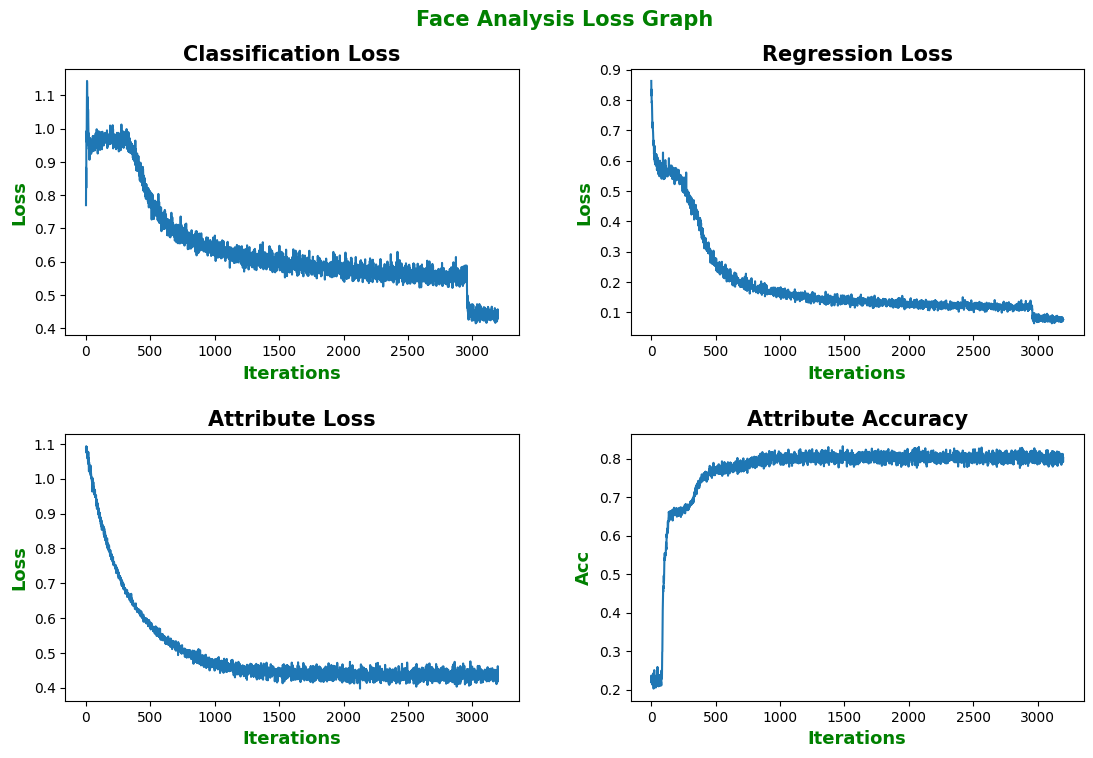

In [6]:
import json
import matplotlib.pyplot as plt

f = open('/content/drive/MyDrive/TOW/Face_Analytics/YOLOv6/loss_his.json')
data = json.load(f)
epochs = len(data['cls_loss'])

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.tight_layout(pad=5.0)

# Set the title for the figure
fig.suptitle('Face Analysis Loss Graph', fontsize=15, c='g', fontweight ="bold")

# Top Left Subplot
axes[0][0].plot(data['cls_loss'])
axes[0][0].set_title("Classification Loss", fontsize=15, fontweight ="bold")
axes[0][0].set_xlabel('Iterations', fontsize=13, c='g', fontweight ="bold")
axes[0][0].set_ylabel('Loss', fontsize=13, c='g', fontweight ="bold")

# Top Right Subplot
axes[0][1].plot(data['bbox_loss'])
axes[0][1].set_title("Regression Loss", fontsize=15, fontweight ="bold")
axes[0][1].set_xlabel('Iterations', fontsize=13, c='g', fontweight ="bold")
axes[0][1].set_ylabel('Loss', fontsize=13, c='g', fontweight ="bold")

# Top Right Subplot
axes[1][0].plot(data['attr_loss'])
axes[1][0].set_title("Attribute Loss", fontsize=15, fontweight ="bold")
axes[1][0].set_xlabel('Iterations', fontsize=13, c='g', fontweight ="bold")
axes[1][0].set_ylabel('Loss', fontsize=13, c='g', fontweight ="bold")

# Top Right Subplot
axes[1][1].plot(data['attr_acc'])
axes[1][1].set_title("Attribute Accuracy", fontsize=15, fontweight ="bold")
axes[1][1].set_xlabel('Iterations', fontsize=13, c='g', fontweight ="bold")
axes[1][1].set_ylabel('Acc', fontsize=13, c='g', fontweight ="bold")

plt.show()

In [ ]:
!python tools/infer.py --yaml data/mydataset.yaml --weights /content/drive/MyDrive/TOW/Face_Analytics/YOLOv6/runs/train/exp/weights/best_ckpt.pt --source /content/drive/MyDrive/TOW/Face_Analytics/datasets/data/images/test